In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [2]:
pickleFile = './DMsimp_spin-1_Monojet_DF.pcl'
df = pd.read_pickle(pickleFile)

In [3]:
print(df.columns)

Index(['Coupling', 'Mode', '$m_{med}$', '$m_{DM}$', '$g_{DM}$', '$g_{q}$',
       'Data-takingperiod', 'Fullsample', 'Triggeremulation',
       '$p_{T}^{miss}>250$GeV', '$p_{T}^{miss}$qualityfilters', 'Electronveto',
       'Muonveto', 'Tauveto', 'Bjetveto', 'Photonveto',
       '$\Delta \phi (jet,p_{T}^{miss})>0.5$ rad',
       '$\Delta p_{T}^{miss}$ (PF-Cal)$<0.5$ rad',
       'LeadingAK4jet$p_{T}>100$GeV', 'LeadingAK4jet$\eta<2.4$',
       'LeadingAK4jetenergyfractions', 'Mono-Voverlapremoval',
       'HCALmitigation(jets)', 'HCALmitigation($\phi^{miss}$)',
       '$\Delta \phi (\mathrm{PF}_\mathrm{Charged})<2.0$ rad',
       'bin_250.0_280.0', 'bin_250.0_280.0_ErrorPlus',
       'bin_250.0_280.0_ErrorMinus', 'bin_280.0_310.0',
       'bin_280.0_310.0_ErrorPlus', 'bin_280.0_310.0_ErrorMinus',
       'bin_310.0_340.0', 'bin_310.0_340.0_ErrorPlus',
       'bin_310.0_340.0_ErrorMinus', 'bin_340.0_370.0',
       'bin_340.0_370.0_ErrorPlus', 'bin_340.0_370.0_ErrorMinus',
       'bin_370.

In [4]:
dfAxialMonoJ = df[(df['Coupling'] == 'Axial') & (df['Mode'] == 'DM+QCDjets')]
dfVectorMonoJ = df[(df['Coupling'] == 'Vector') & (df['Mode'] == 'DM+QCDjets')]

In [5]:
dfAxialMonoJ

,Coupling,Mode,$m_{med}$,$m_{DM}$,$g_{DM}$,$g_{q}$,Data-takingperiod,Fullsample,Triggeremulation,$p_{T}^{miss}>250$GeV,...,bin_1020.0_1090.0_ErrorMinus,bin_1090.0_1160.0,bin_1090.0_1160.0_ErrorPlus,bin_1090.0_1160.0_ErrorMinus,bin_1160.0_1250.0,bin_1160.0_1250.0_ErrorPlus,bin_1160.0_1250.0_ErrorMinus,bin_1250.0_1400.0,bin_1250.0_1400.0_ErrorPlus,bin_1250.0_1400.0_ErrorMinus
6,Axial,DM+QCDjets,100.0,1.0,1.0,0.25,2016,NaN,NaN,NaN,...,-136.010000,158.370000,82.904000,-82.904000,126.660000,55.431000,-55.431000,222.470000,88.543000,-88.543000
264,Axial,DM+QCDjets,100.0,1.0,1.0,0.25,2017,1.0,0.84529,0.18131,...,-195.900000,132.830000,89.230000,-89.230000,250.890000,154.800000,-154.800000,137.030000,96.896000,-96.896000
522,Axial,DM+QCDjets,100.0,1.0,1.0,0.25,2018,1.0,0.81867,0.17612,...,-280.130000,138.880000,262.210000,-262.210000,-147.320000,187.180000,-187.180000,215.100000,257.490000,-257.490000
8,Axial,DM+QCDjets,100.0,30.0,1.0,0.25,2016,NaN,NaN,NaN,...,-82.097000,160.280000,75.650000,-75.650000,62.839000,51.141000,-51.141000,204.130000,78.325000,-78.325000
266,Axial,DM+QCDjets,100.0,30.0,1.0,0.25,2017,1.0,0.84545,0.18221,...,-113.610000,85.446000,84.040000,-84.040000,51.218000,87.688000,-87.688000,108.090000,106.700000,-106.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Axial,DM+QCDjets,2500.0,1000.0,1.0,0.25,2017,1.0,0.90069,0.47335,...,-0.044993,0.381990,0.038068,-0.038068,0.322040,0.034465,-0.034465,0.844780,0.055232,-0.055232
546,Axial,DM+QCDjets,2500.0,1000.0,1.0,0.25,2018,1.0,0.88296,0.47240,...,-0.065088,0.526230,0.059403,-0.059403,0.484880,0.056180,-0.056180,1.129600,0.079979,-0.079979
31,Axial,DM+QCDjets,2500.0,1500.0,1.0,0.25,2016,NaN,NaN,NaN,...,-0.000056,0.000987,0.000049,-0.000049,0.000920,0.000047,-0.000047,0.002347,0.000076,-0.000076
289,Axial,DM+QCDjets,2500.0,1500.0,1.0,0.25,2017,1.0,0.90311,0.49001,...,-0.000105,0.001132,0.000086,-0.000086,0.000962,0.000086,-0.000086,0.002792,0.000139,-0.000139


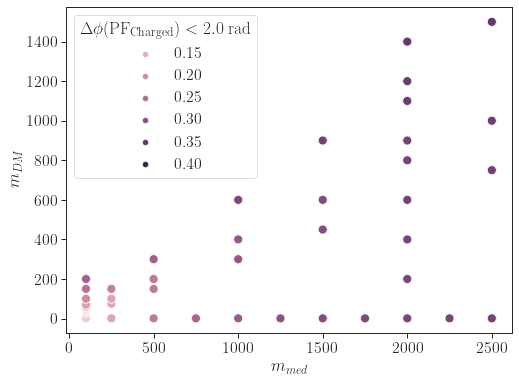

In [8]:
plt.figure(figsize=(8,6))
p =sns.scatterplot(data=dfAxialMonoJ,x='$m_{med}$', y='$m_{DM}$',
                hue='$\Delta \phi (\mathrm{PF}_\mathrm{Charged})<2.0$ rad',s=80)


In [9]:
dfAxialMonoJ[(dfAxialMonoJ['$m_{med}$'] == 2000.) 
             & (dfAxialMonoJ['$m_{DM}$'] == 1.) 
             & (dfAxialMonoJ['Data-takingperiod'] == 2017)][[c for c in df.columns if not 'bin_' in c]].T

,281
Coupling,Axial
Mode,DM+QCDjets
$m_{med}$,2000.0
$m_{DM}$,1.0
$g_{DM}$,1.0
$g_{q}$,0.25
Data-takingperiod,2017
Fullsample,1.0
Triggeremulation,0.89878
$p_{T}^{miss}>250$GeV,0.45603
